In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [11]:
# Step 1: Generate synthetic classification data
X, y = make_classification(n_samples=500, n_features=3, n_informative=3, n_repeated=0, n_redundant=0, random_state=42)


In [12]:
df = pd.DataFrame(X, columns=['NDVI','SAVI','EVI'])

df['cultivo'] = np.where(y,'Arroz', 'Pasto')

In [13]:
df

,NDVI,SAVI,EVI,cultivo
0,-0.700467,-0.591764,-1.670430,Pasto
1,-0.792493,-1.280908,0.654579,Pasto
2,1.143962,1.398934,3.058842,Arroz
3,-0.843922,-0.968257,-1.908295,Pasto
4,-0.833106,-0.257403,-1.944526,Pasto
...,...,...,...,...
495,0.675970,-1.167655,1.259195,Arroz
496,2.339180,0.318080,3.775516,Arroz
497,0.133355,0.157413,0.745759,Pasto
498,0.813232,0.967177,1.841748,Arroz


In [14]:
# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


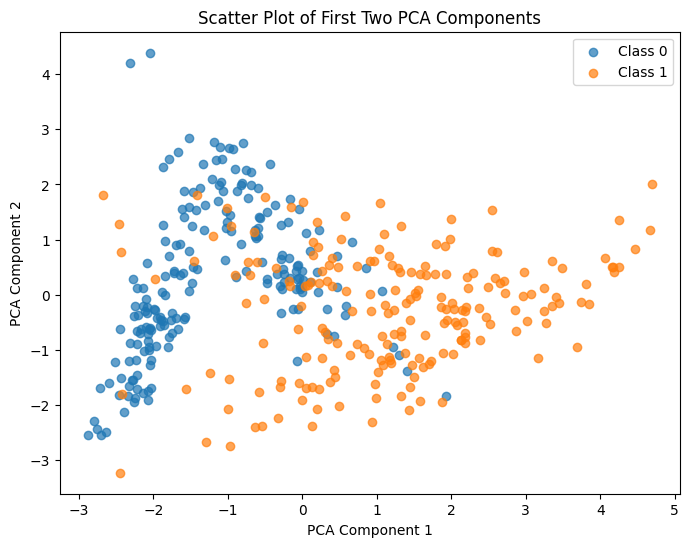

In [16]:
# Step 3: Visualize data using PCA (reduce dimensions to 2 for plotting)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot data points with different classes using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], label="Class 1", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Scatter Plot of First Two PCA Components")
plt.legend()
plt.show()

In [17]:
# Step 4: Initialize and fit the classification model
clf_model = LogisticRegression(random_state=42)
clf_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [18]:
# Step 5: Make predictions using the trained model
y_pred = clf_model.predict(X_test)

Confusion Matrix:


<AxesSubplot: >

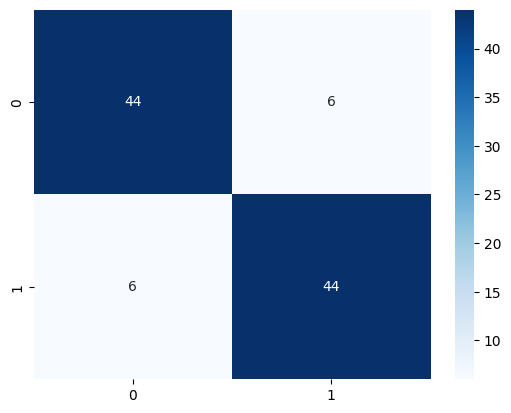

In [24]:
# Step 6: Evaluate the model's performance using confusion matrix and ROC curve
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf_model.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, clf_model.predict_proba(X_test)[:, 1])

print("Confusion Matrix:")
sns.heatmap(conf_matrix, cmap='Blues', annot=True)


Area under ROC curve: 0.9492


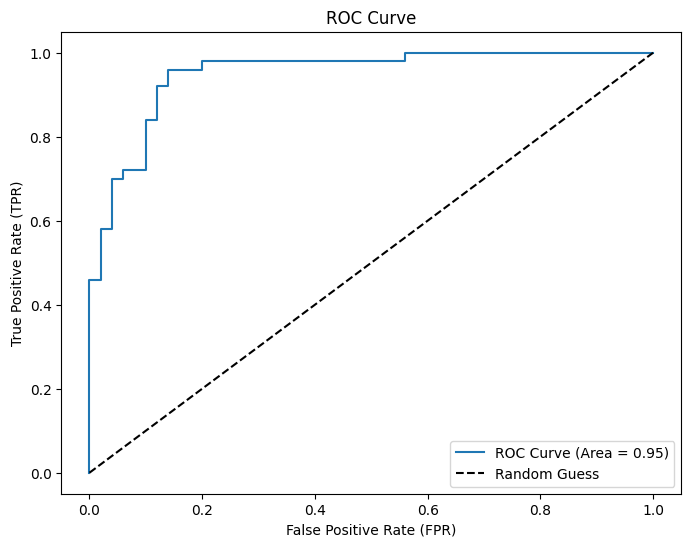

In [25]:
print("Area under ROC curve:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (Area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()
